# In this ecommerce case study, we will use multi-variable linear regression to identify the variables that affect targeted output (Yearly amount spent).  We will use the calculated regression equation to predict various outcomes.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/Users/lenkwok/Desktop/projects/Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,campaigns@emails.swellsystem.com,"1844 Sir Tyler Drive, Wilmington, NC 28405",NaN,nan,nan,nan,nan,nan
1,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.49727,12.65565,39.57767,4.08262,587.95105
2,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.92627,11.10946,37.26896,2.66403,392.20493
3,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.00091,11.33028,37.11060,4.10454,487.54750
4,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.30556,13.71751,36.72128,3.12018,581.85234


In [3]:
# identify NaN or null values
null_data = df[df.isnull().any(axis=1)]
null_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,campaigns@emails.swellsystem.com,"1844 Sir Tyler Drive, Wilmington, NC 28405",NaN,nan,nan,nan,nan,nan
27,team@covve.com,NaN,DarkOrchid,nan,nan,nan,nan,nan


In [14]:
#confirm no more null values
df1.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [11]:
#Drop the above two rows with any NaN values
df1=df.dropna()


In [20]:
# Correlation
df1_corr = df1.corr()

In [17]:
# Sort by column yearly amount spent
df1.corr()['Yearly Amount Spent'].sort_values()

Time on Website        -0.00238
Avg. Session Length     0.35425
Time on App             0.49918
Length of Membership    0.80865
Yearly Amount Spent     1.00000
Name: Yearly Amount Spent, dtype: float64

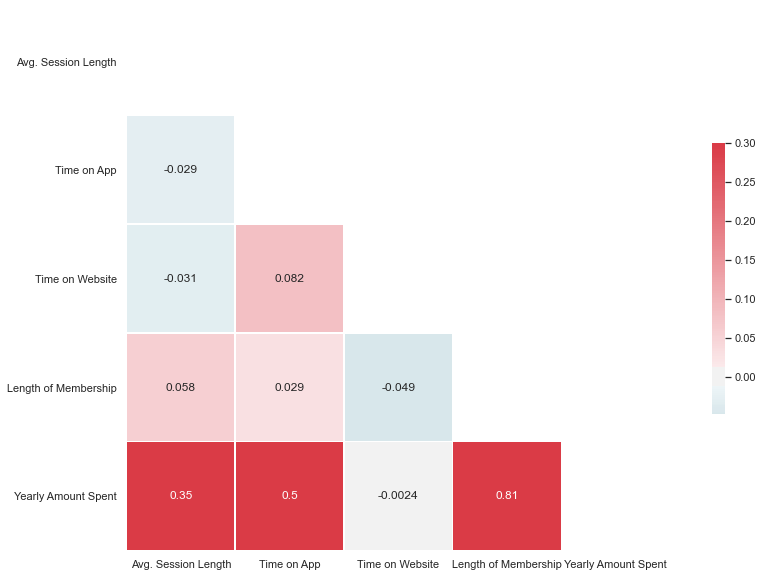

In [19]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df1_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df1_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

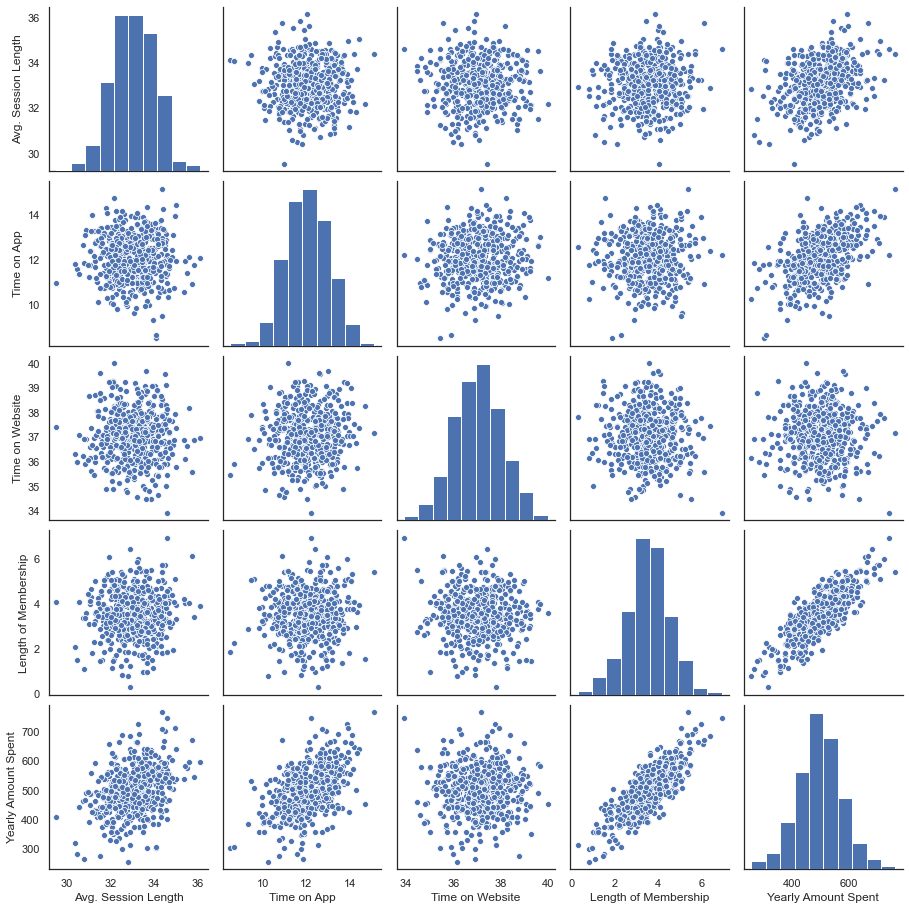

In [15]:
sns.pairplot(df1) 
#Length of Membership has really perfect linearity, 
#it is so obvious that if I can increase the customer loyalty, they will spend more! But how much?

In [23]:
y=df1["Yearly Amount Spent"]
X=df1[[ "Length of Membership", "Time on App", "Time on Website", 'Avg. Session Length']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [25]:
#Building the model
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     6248.
Date:                 Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                         11:29:58   Log-Likelihood:                -1488.2
No. Observations:                  400   AIC:                             2986.
Df Residuals:                      395   BIC:                             3006.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1042.5874     25.748    -40.493      0.000   -1093.207    -991.968
Length of Membership    61.5306      0.504    121.981      0.000      60.539      62.522
Time on App             38.5614      0.504     76.449      0.000      37.570      39.553
Time on Website          0.2667      0.496      0.537      0.591      -0.709       1.242
Avg. Session Length     25.7163      0.502     51.254      0.000      24.730      26.703
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.024
Skew:                           0.001   Prob(JB):                        0.988
Kurtosis:                       3.038   Cond. No.                     2.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#Re-iterate after dropping Time on website
X2=df1[["Length of Membership", "Time on App", 'Avg. Session Length']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2)

In [31]:
#Building the model
X2_train = sm.add_constant(X2_train)
results = sm.OLS(y2_train, X2_train).fit()
results.summary() #R-squared improves.  Adj R-squared too, after removing of unwanted variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     8515.
Date:                 Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                         11:33:24   Log-Likelihood:                -1488.0
No. Observations:                  400   AIC:                             2984.
Df Residuals:                      396   BIC:                             3000.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1033.7767     18.154    -56.944      0.000   -1069.468    -998.086
Length of Membership    61.4694      0.497    123.583      0.000      60.492      62.447
Time on App             38.6414      0.494     78.171      0.000      37.670      39.613
Avg. Session Length     25.7332      0.515     49.937      0.000      24.720      26.746
==============================================================================
Omnibus:                        0.021   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.090
Skew:                          -0.002   Prob(JB):                        0.956
Kurtosis:                       2.927   Cond. No.                     1.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

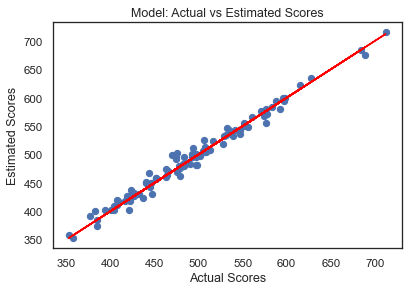

In [34]:
X2_test = sm.add_constant(X2_test)

y2_preds = results.predict(X2_test)

plt.figure(dpi = 75)
plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Model: Actual vs Estimated Scores")
plt.show()

Now our model is this:

Yearly Amount Spent = -1036.1429 + 61.75x(Length of Membership) + 38.94x(Time on App) + 25.67x(Avg. Session Length)

This means, for example, if we can increase the length of membership 1 year more and holding all other features fixed, one person will spend 61.75 dollars more!